# 0. Init

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/NUS_MSBA/CS5344/CS5344 project/dataset

/content/drive/MyDrive/NUS_MSBA/CS5344/CS5344 project/dataset


In [3]:
import csv
import os
import json
import argparse
import random
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


from tqdm import tqdm

# # spelling
# from spellchecker import SpellChecker

# nltk
import nltk
from nltk.corpus import stopwords

# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize

# # language detector
# from langdetect import detect
# from langdetect import DetectorFactory
# DetectorFactory.seed = 0

# 'here_for,'smoke','drink', 'match_age'
union_meta = ['scam','username','age','gender','location','ethnicity','occupation','marital_status','children','religion','sexual_orientation','sex', 'description']

scam_meta = ['email']

tqdm.pandas()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
all_profile = pd.read_csv("processed_data.csv")

In [5]:
all_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56984 entries, 0 to 56983
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.3          56984 non-null  int64  
 1   Unnamed: 0.2          56984 non-null  int64  
 2   Unnamed: 0.1          56984 non-null  int64  
 3   Unnamed: 0            56984 non-null  int64  
 4   scam                  56984 non-null  int64  
 5   username              56984 non-null  object 
 6   age                   56980 non-null  float64
 7   gender                56984 non-null  object 
 8   location              55956 non-null  object 
 9   ethnicity             52661 non-null  object 
 10  occupation            34584 non-null  object 
 11  marital_status        55041 non-null  object 
 12  children              51452 non-null  object 
 13  religion              51112 non-null  object 
 14  sexual_orientation    51451 non-null  object 
 15  sex                

# EDA

In [6]:
value_counts_dict = {}
for column in all_profile.columns:
    value_counts_dict[column] = all_profile[column].value_counts(normalize=True) * 100

value_counts_df = pd.DataFrame(value_counts_dict)

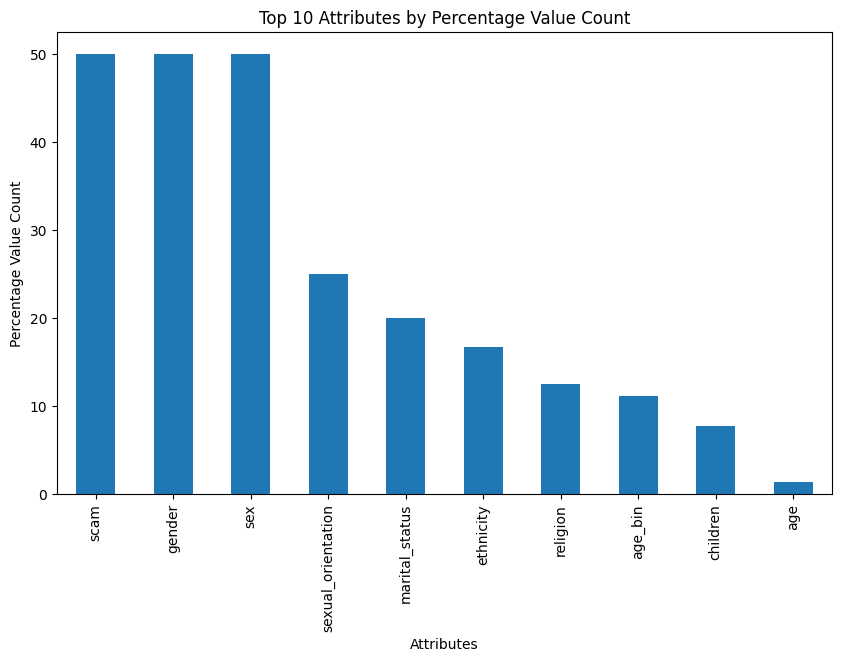

In [7]:
# Plot the top 10 attributes for all_profile
top_10_attributes = value_counts_df.mean().nlargest(10)
top_10_attributes.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Attributes by Percentage Value Count')
plt.xlabel('Attributes')
plt.ylabel('Percentage Value Count')
plt.show()

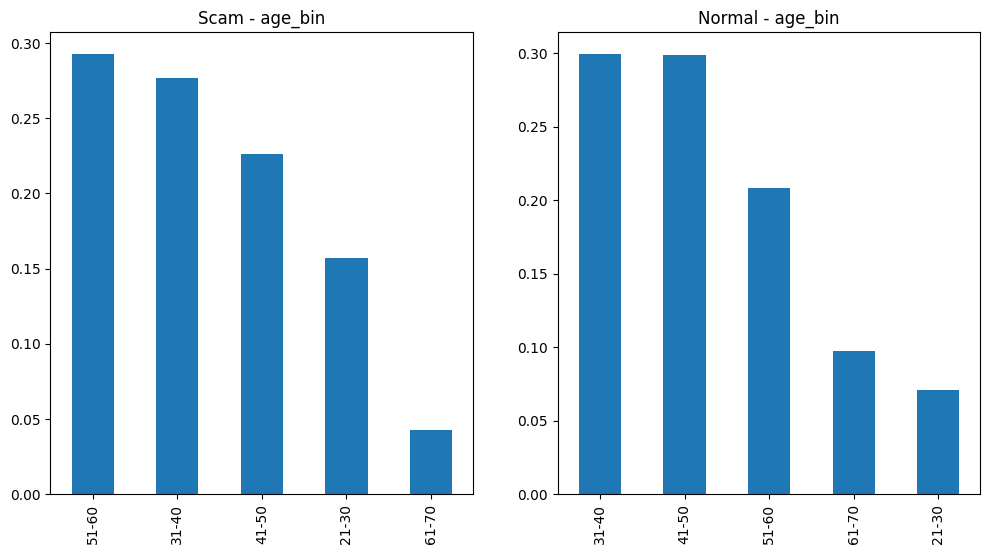

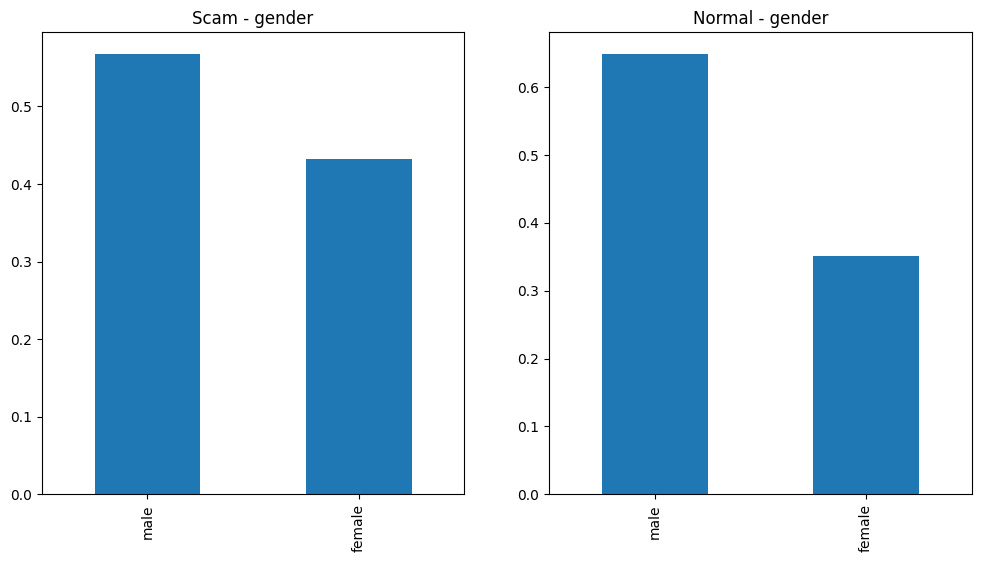

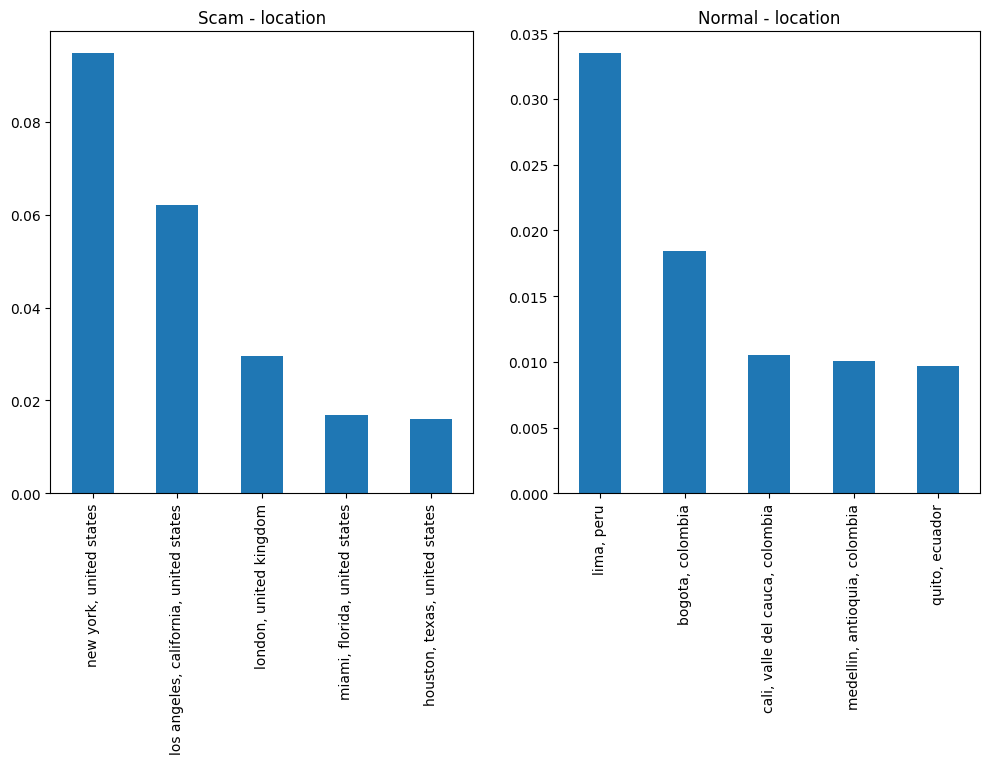

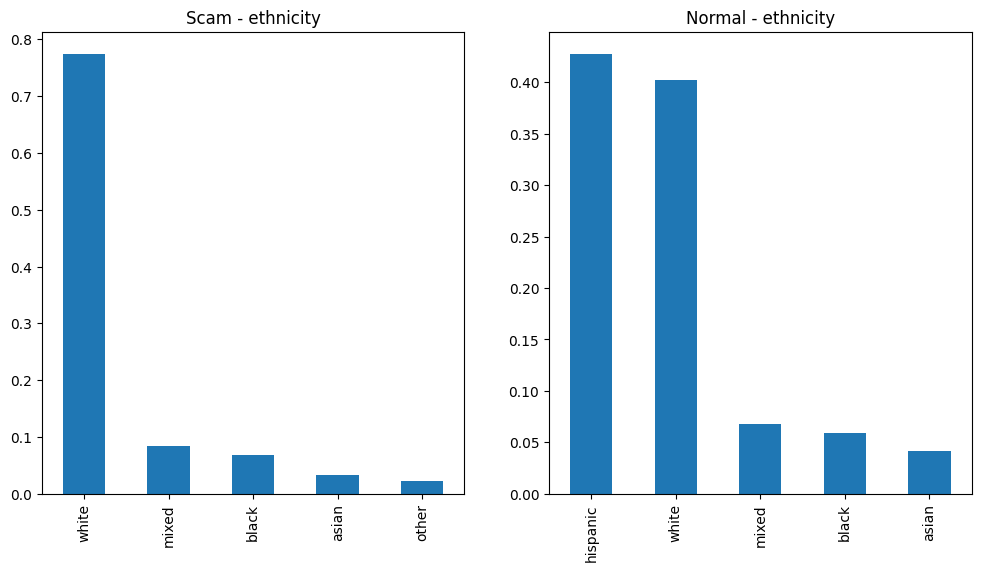

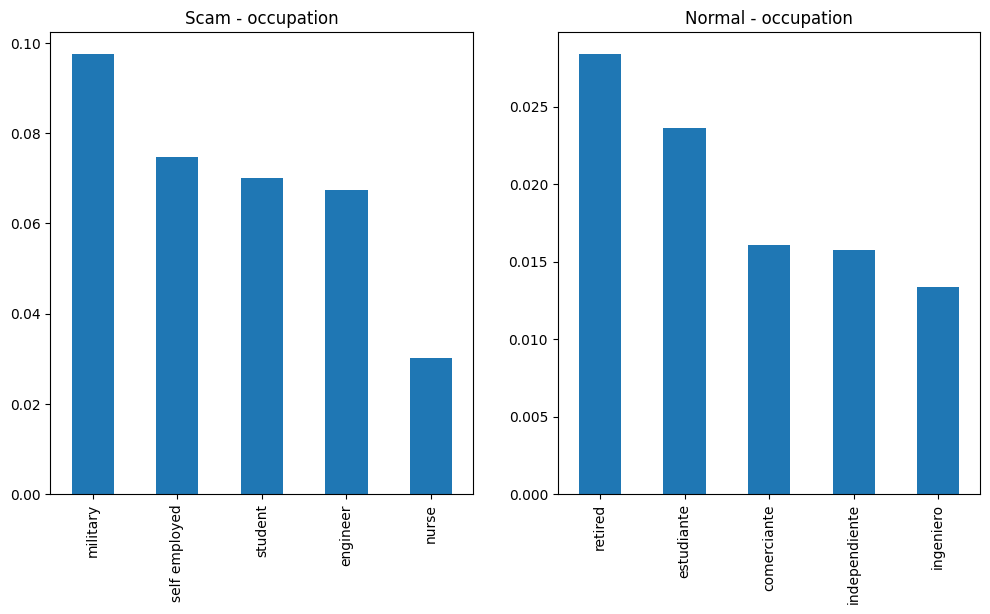

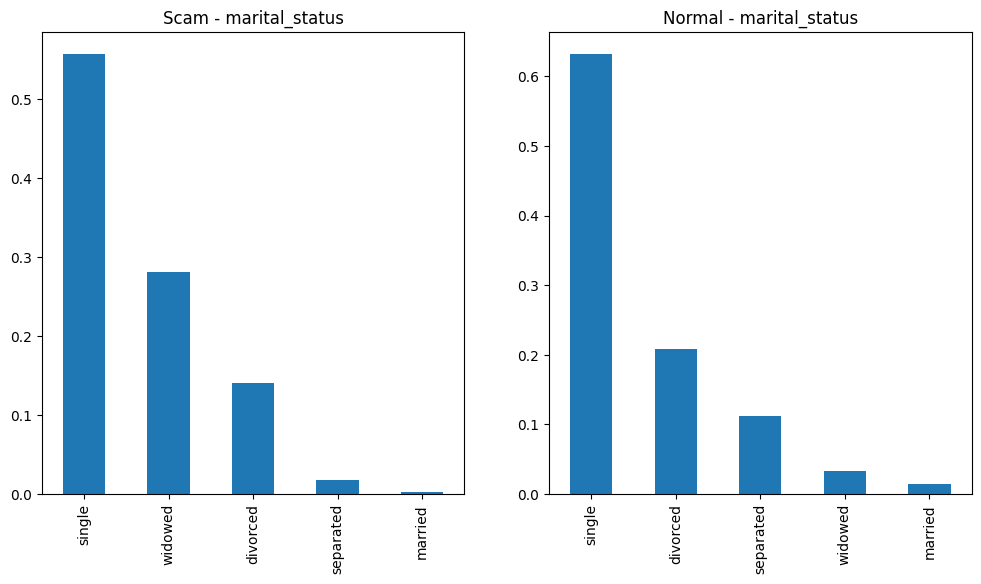

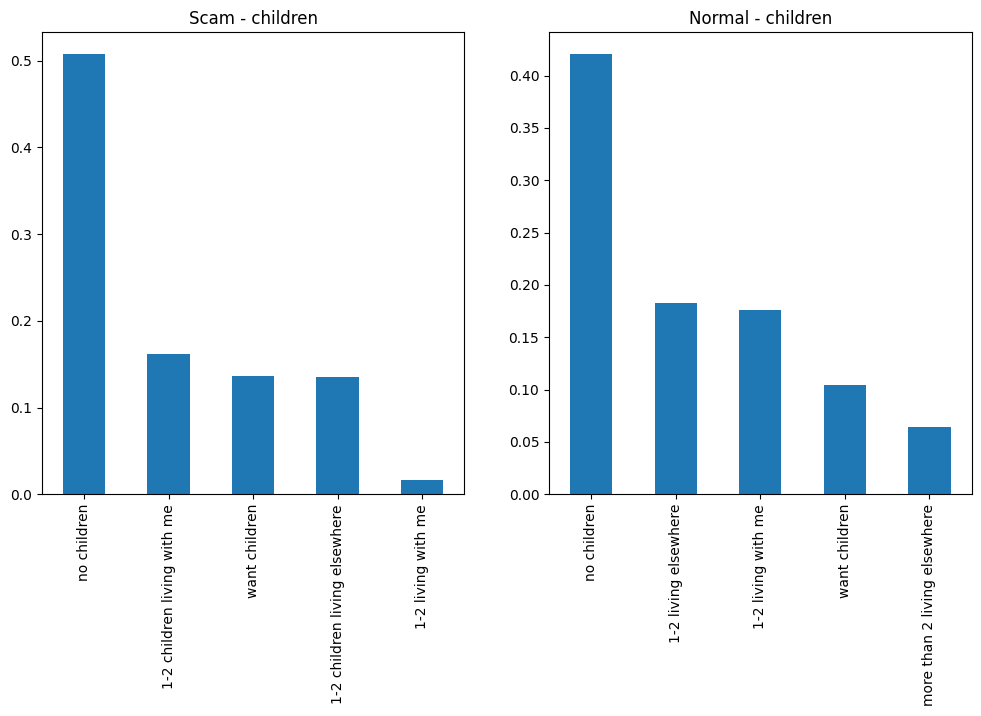

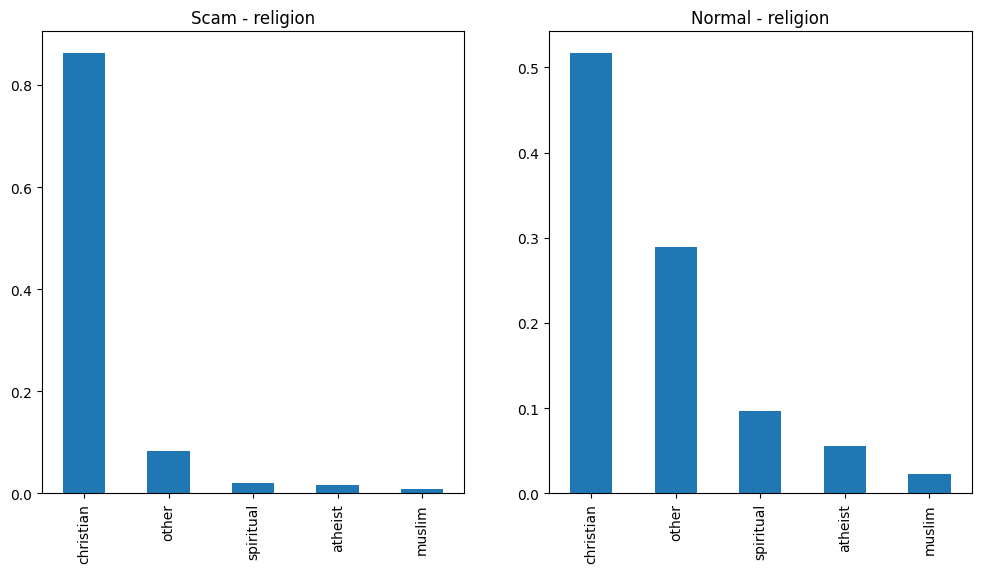

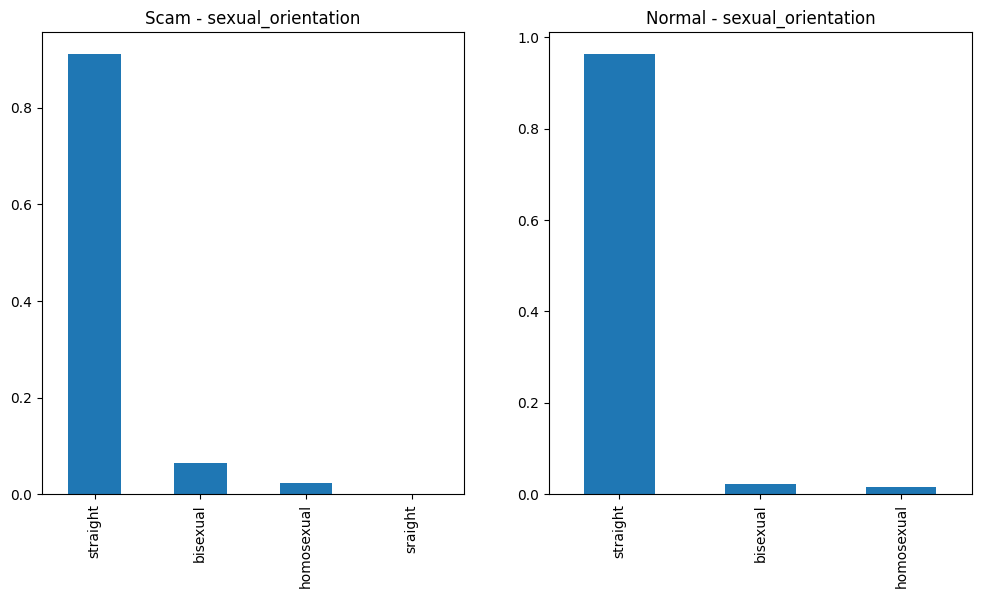

In [8]:
all_profile_scam = all_profile[all_profile['scam'] == 1]
all_profile_normal = all_profile[all_profile['scam'] == 0]

col_interest = ['age_bin','gender','location','ethnicity','occupation','marital_status','children','religion','sexual_orientation']

top_scam = {}
top_normal = {}

for col in col_interest:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    all_profile_scam[col].value_counts(normalize=True).head(5).plot(kind='bar', ax=axes[0], title=f"Scam - {col}")
    top_scam[col] = all_profile_scam[col].value_counts(normalize=True).head(5)
    all_profile_normal[col].value_counts(normalize=True).head(5).plot(kind='bar', ax=axes[1], title=f"Normal - {col}")
    top_normal[col] = all_profile_normal[col].value_counts(normalize=True).head(5)
    plt.show()

In [9]:
top_scam

{'age_bin': 51-60    0.292623
 31-40    0.276613
 41-50    0.226110
 21-30    0.156792
 61-70    0.042581
 Name: age_bin, dtype: float64,
 'gender': male      0.567282
 female    0.432718
 Name: gender, dtype: float64,
 'location': new york, united states                   0.094718
 los angeles, california, united states    0.062153
 london, united kingdom                    0.029587
 miami, florida, united states             0.016878
 houston, texas, united states             0.016084
 Name: location, dtype: float64,
 'ethnicity': white    0.774412
 mixed    0.084807
 black    0.068331
 asian    0.033923
 other    0.021808
 Name: ethnicity, dtype: float64,
 'occupation': military         0.097518
 self employed    0.074799
 student          0.070080
 engineer         0.067459
 nurse            0.030234
 Name: occupation, dtype: float64,
 'marital_status': single       0.557182
 widowed      0.281089
 divorced     0.141061
 separated    0.018085
 married      0.002584
 Name: marital_st

In [10]:
top_normal

{'age_bin': 31-40    0.299372
 41-50    0.298822
 51-60    0.208327
 61-70    0.097270
 21-30    0.071131
 Name: age_bin, dtype: float64,
 'gender': male      0.648449
 female    0.351551
 Name: gender, dtype: float64,
 'location': lima, peru                         0.033464
 bogota, colombia                   0.018460
 cali, valle del cauca, colombia    0.010546
 medellin, antioquia, colombia      0.010055
 quito, ecuador                     0.009701
 Name: location, dtype: float64,
 'ethnicity': hispanic    0.427680
 white       0.402501
 mixed       0.068200
 black       0.059237
 asian       0.041991
 Name: ethnicity, dtype: float64,
 'occupation': retired          0.028376
 estudiante       0.023630
 comerciante      0.016042
 independiente    0.015730
 ingeniero        0.013374
 Name: occupation, dtype: float64,
 'marital_status': single       0.632294
 divorced     0.208145
 separated    0.111892
 widowed      0.033147
 married      0.014522
 Name: marital_status, dtype: float64

In [11]:
all_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56984 entries, 0 to 56983
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.3          56984 non-null  int64  
 1   Unnamed: 0.2          56984 non-null  int64  
 2   Unnamed: 0.1          56984 non-null  int64  
 3   Unnamed: 0            56984 non-null  int64  
 4   scam                  56984 non-null  int64  
 5   username              56984 non-null  object 
 6   age                   56980 non-null  float64
 7   gender                56984 non-null  object 
 8   location              55956 non-null  object 
 9   ethnicity             52661 non-null  object 
 10  occupation            34584 non-null  object 
 11  marital_status        55041 non-null  object 
 12  children              51452 non-null  object 
 13  religion              51112 non-null  object 
 14  sexual_orientation    51451 non-null  object 
 15  sex                

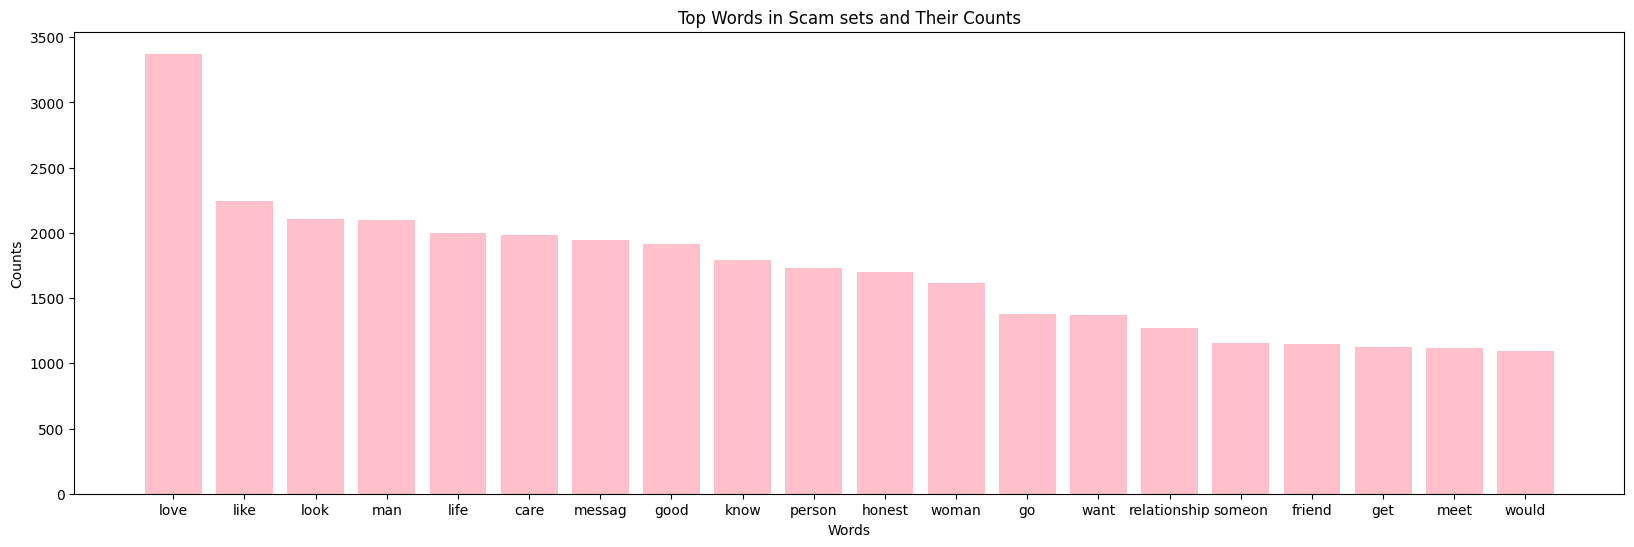

In [12]:
# Separate the sets for scam and normal
scam_sets = all_profile[all_profile['scam'] == 1]['description_stem_set'].dropna()
normal_sets = all_profile[all_profile['scam'] == 0]['description_stem_set'].dropna()

# Step 1: Create {word, count=1} pair for each cell
word_counts = Counter()
for word_set in scam_sets:
    word_set = re.sub(r'[^a-zA-Z0-9\s]', '', word_set).split()
    word_counts.update(word_set)

# Step 2: Aggregate all counts at the word level for the entire column
word_counts_aggregated = dict(word_counts)

# Step 3: Get the top 5 words with their counts
top_words = dict(Counter(word_counts_aggregated).most_common(20))

words = list(top_words.keys())
counts = list(top_words.values())

# Creating the bar plot
plt.figure(figsize=(20, 6))
plt.bar(words, counts, color='pink')
plt.title('Top Words in Scam sets and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [13]:
top_words

{'love': 3374,
 'like': 2244,
 'look': 2108,
 'man': 2097,
 'life': 1998,
 'care': 1987,
 'messag': 1947,
 'good': 1914,
 'know': 1793,
 'person': 1732,
 'honest': 1699,
 'woman': 1615,
 'go': 1376,
 'want': 1372,
 'relationship': 1271,
 'someon': 1153,
 'friend': 1149,
 'get': 1125,
 'meet': 1121,
 'would': 1092}

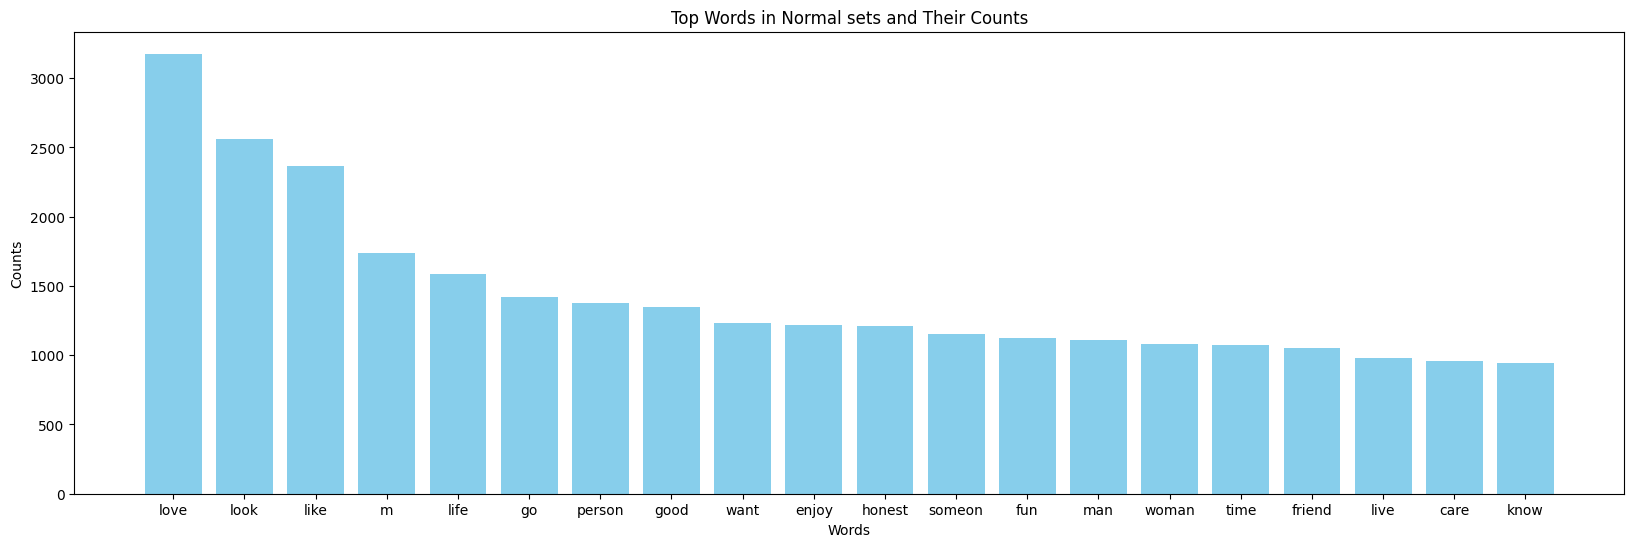

In [14]:
# Step 1: Create {word, count=1} pair for each cell
word_counts = Counter()
for word_set in normal_sets:
    word_set = re.sub(r'[^a-zA-Z0-9\s]', '', word_set).split()
    word_counts.update(word_set)

# Step 2: Aggregate all counts at the word level for the entire column
word_counts_aggregated = dict(word_counts)

# Step 3: Get the top 5 words with their counts
top_words = dict(Counter(word_counts_aggregated).most_common(20))

words = list(top_words.keys())
counts = list(top_words.values())

# Creating the bar plot
plt.figure(figsize=(20, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top Words in Normal sets and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [15]:
top_words

{'love': 3177,
 'look': 2563,
 'like': 2366,
 'm': 1741,
 'life': 1589,
 'go': 1419,
 'person': 1376,
 'good': 1346,
 'want': 1233,
 'enjoy': 1221,
 'honest': 1209,
 'someon': 1156,
 'fun': 1125,
 'man': 1113,
 'woman': 1081,
 'time': 1075,
 'friend': 1051,
 'live': 979,
 'care': 958,
 'know': 942}

In [16]:
# extract meta feature
stopwords = set(stopwords.words('english'))

def transform(df, col):
    df['word_count'] = df[col].apply(lambda x: len(str(x).split()))
    df['unique_word_count'] = df[col].apply(lambda x: len(set(str(x).split())))
    df['stop_word_count'] = df[col].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
    df['mean_word_length'] = df[col].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['char_count'] = df[col].apply(lambda x: len(str(x)))
    return df

scam_sets = all_profile[all_profile['scam'] == 1][['description']].dropna()
normal_sets = all_profile[all_profile['scam'] == 0][['description']].dropna()

transformed_scam_df = transform(scam_sets, 'description')
transformed_normal_df = transform(normal_sets, 'description')

In [17]:
transformed_scam_df

,description,word_count,unique_word_count,stop_word_count,mean_word_length,char_count
50918,hi there i’m new here looking for a single man...,23,22,9,3.956522,114
50919,"am a cool headed,easy going ,honest,loving car...",23,22,8,5.652174,153
50920,you can always be sure in my sincerity and hon...,57,41,30,4.403509,308
50921,i’m 5’9 and i’m an independent woman friendly ...,27,24,11,4.444444,147
50922,am quite.caring and loving woman. am family or...,28,24,9,5.107143,171
...,...,...,...,...,...,...
56975,"as an engineer, i’m a deep and innovative thin...",111,77,49,4.567568,619
56980,"i am a mature,single man. i am 52 years old no...",107,70,52,4.242991,563
56981,"i am a mature,single man. i am 52 years old no...",107,70,52,4.242991,563
56982,"i’m focused, sincere, caring,compasionate,dedi...",158,109,76,4.696203,900


In [18]:
meta_feature_list = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length', 'char_count']
max_values = {'word_count': 600, 'unique_word_count': 300, 'stop_word_count': 300, 'mean_word_length': 20, 'char_count': 3000}
widths = [20, 10, 10, 1, 100]

from matplotlib.ticker import MaxNLocator

def plot_distribution(df1, df2, feature_list, max_values):
    fig, axes = plt.subplots(nrows=len(feature_list), ncols=2, figsize=(20, 5*len(feature_list)))

    for i, feature in enumerate(feature_list):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        ax1.hist(df1[feature], label='Scam', color='pink', width=widths[i])
        ax1.set_title(f'Scam - {feature}')
        ax1.legend()
        ax1.set_xlim([0, max_values[feature]])
        ax1.set_ylim([0, max(max(np.histogram(df1[feature])[0])+1000, max(np.histogram(df2[feature])[0])+1000)])
        ax1.tick_params(axis='x', labelsize=8)
        ax1.set_ylabel('Document Count')
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

        ax2.hist(df2[feature], label='Normal', color='skyblue', width=widths[i])
        ax2.set_title(f'Normal - {feature}')
        ax2.legend()
        ax2.set_xlim([0, max_values[feature]])
        ax2.set_ylim([0, max(max(np.histogram(df1[feature])[0])+1000, max(np.histogram(df2[feature])[0])+1000)])
        ax2.tick_params(axis='x', labelsize=8)
        ax2.set_ylabel('Document Count')
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

    plt.tight_layout()
    plt.show()

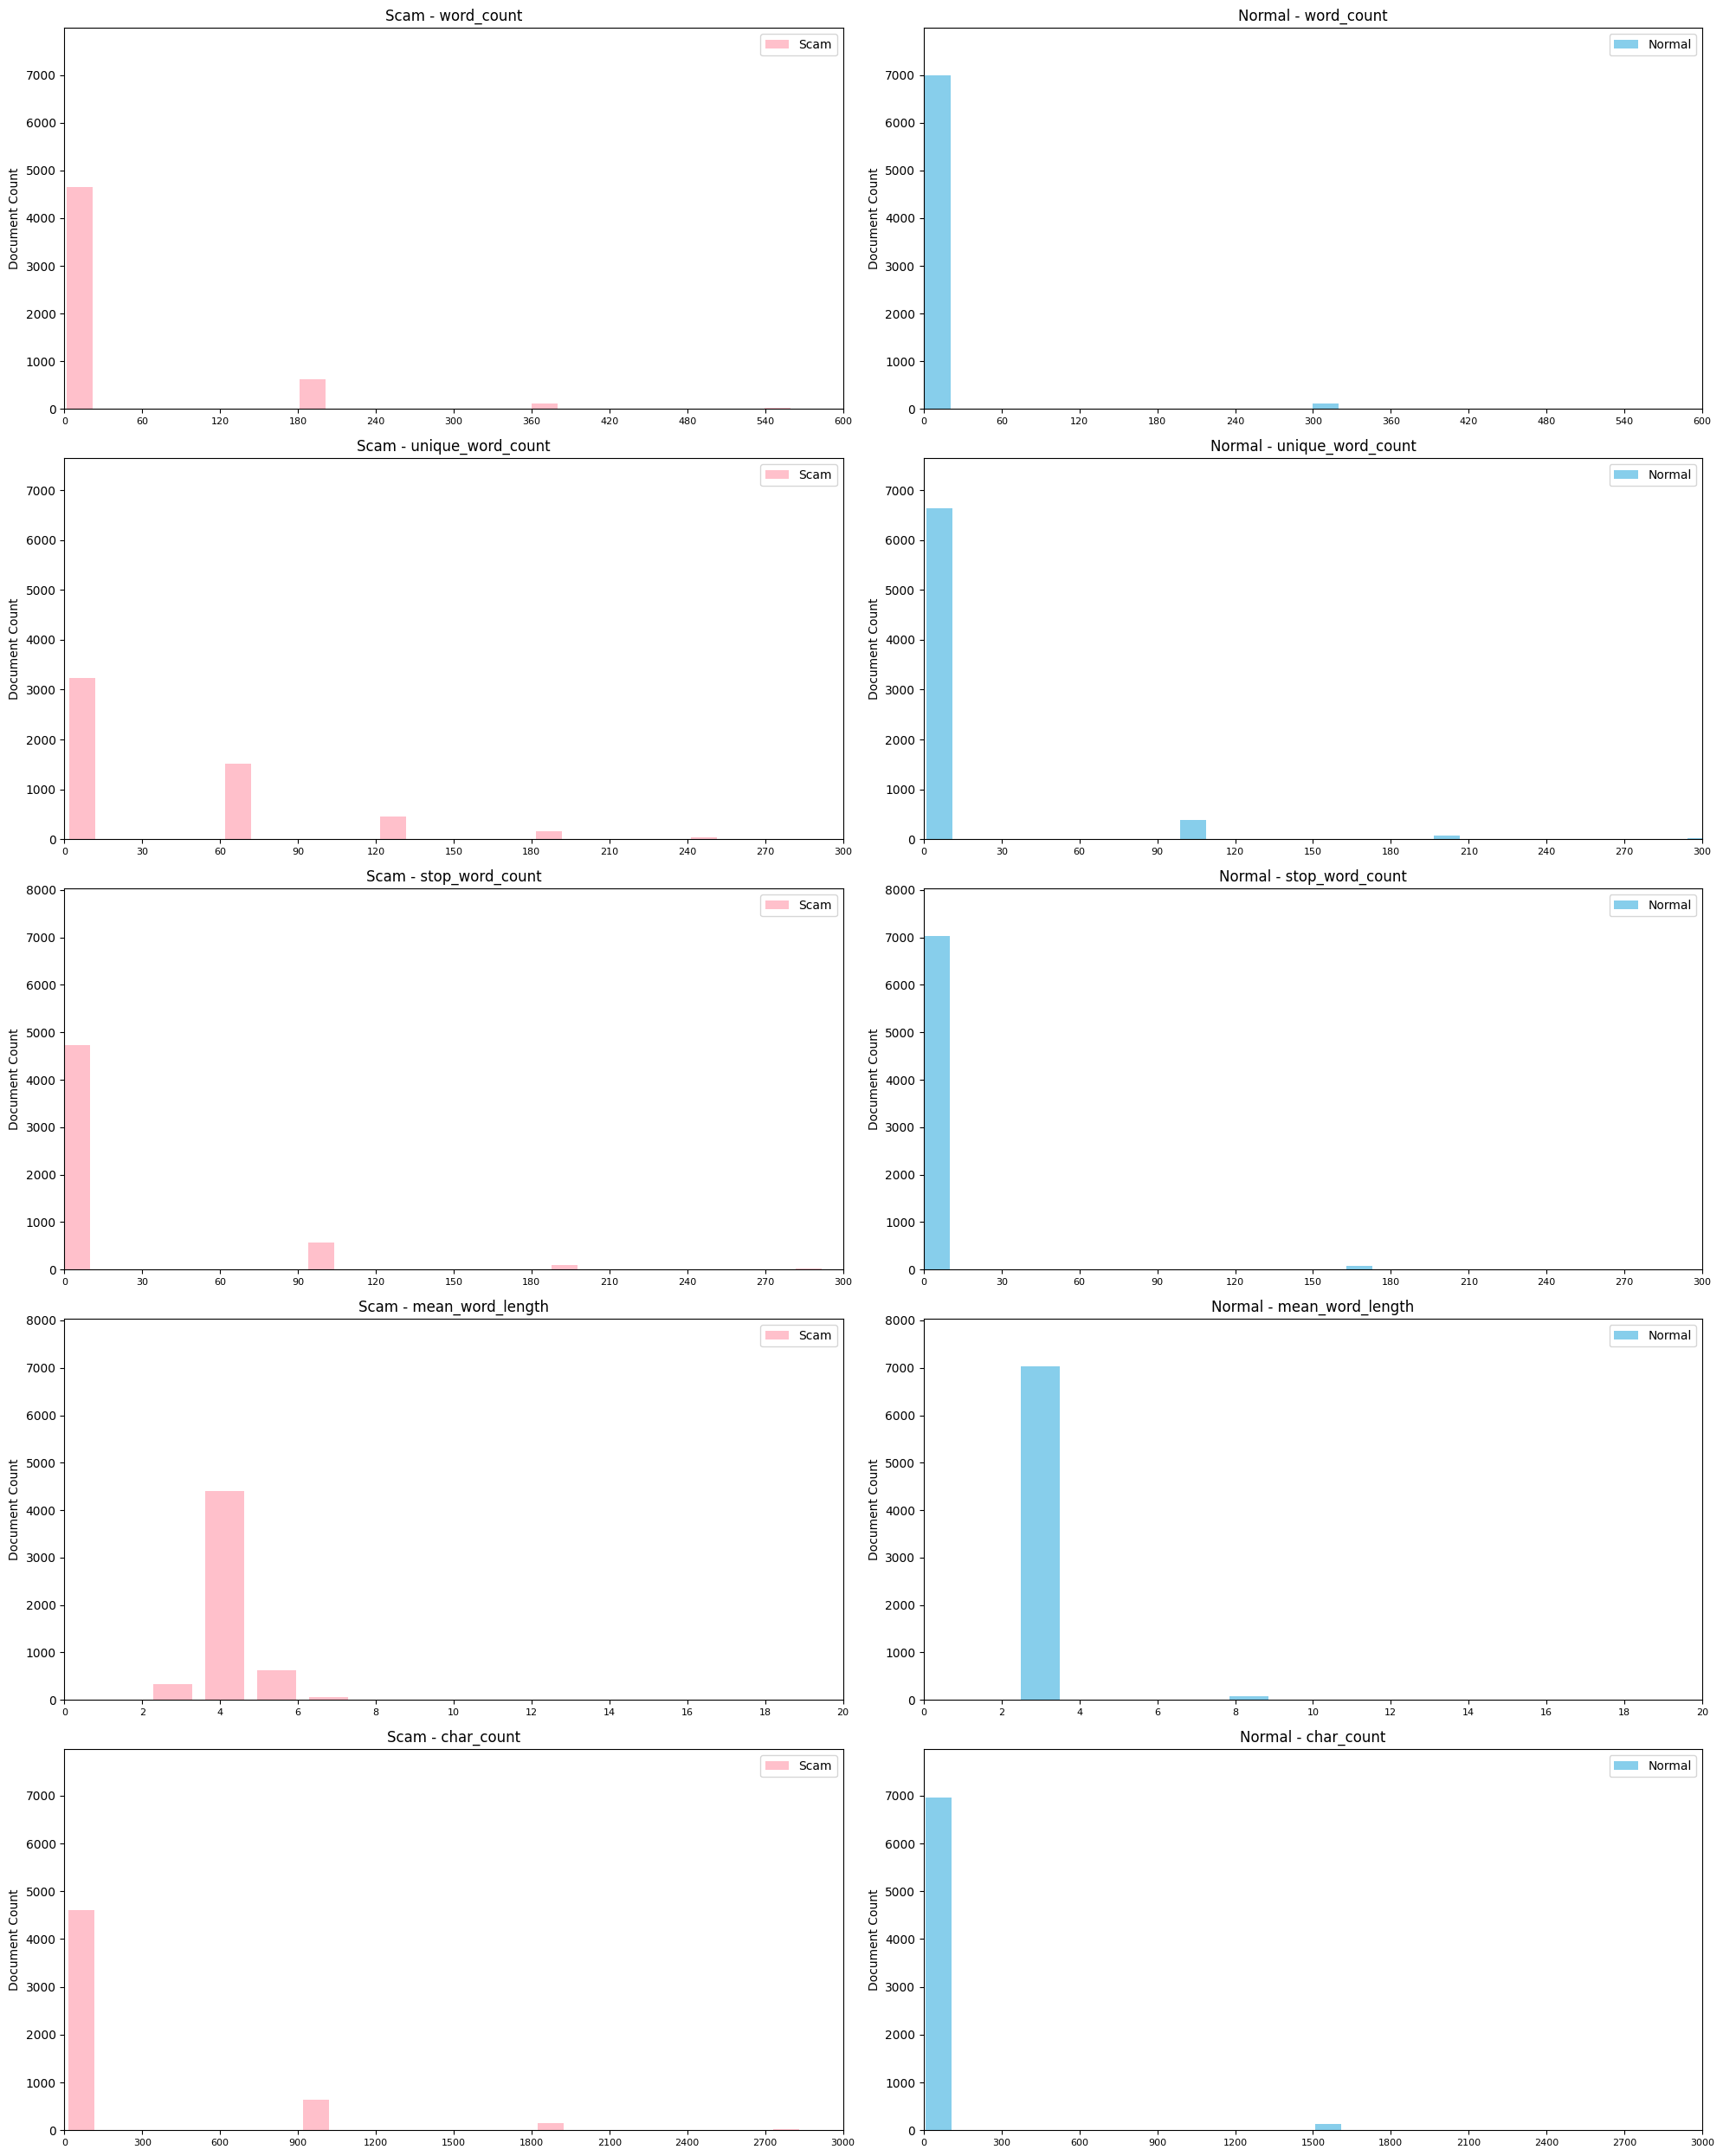

In [19]:
# Plot the distribution of meta features
plot_distribution(transformed_scam_df, transformed_normal_df, meta_feature_list, max_values)

In [20]:
transformed_scam_df[meta_feature_list].describe()

,word_count,unique_word_count,stop_word_count,mean_word_length,char_count
count,5452.000000,5452.000000,5452.000000,5452.000000,5452.000000
mean,100.309244,64.959281,48.830704,4.401767,535.559611
std,115.316864,57.385568,58.451982,0.698464,608.380858
min,2.000000,2.000000,0.000000,2.285714,14.000000
25%,30.000000,25.000000,13.000000,4.022990,160.750000
50%,67.000000,50.000000,32.000000,4.309307,361.000000
75%,128.000000,87.000000,62.000000,4.641626,682.250000
max,1794.000000,601.000000,939.000000,15.600000,9071.000000


In [21]:
transformed_normal_df[meta_feature_list].describe()

,word_count,unique_word_count,stop_word_count,mean_word_length,char_count
count,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000
mean,52.789067,38.362563,23.697021,4.573551,282.062535
std,85.221366,43.548325,43.046790,1.177181,447.293681
min,1.000000,1.000000,0.000000,2.500000,8.000000
25%,16.000000,15.000000,6.000000,4.000000,86.000000
50%,29.000000,25.000000,12.000000,4.360272,155.000000
75%,58.000000,45.000000,26.000000,4.875000,310.250000
max,2991.000000,979.000000,1628.000000,56.000000,15023.000000
